In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import collections as co

In [2]:
def findJudgeDict(data):
    """Using clerkship data create a dictionary:
    {key=Judge Name): value=list of law schools of his/her all clerks) }

    @param DataFrame data: clerkship table 
    @return dict: {key: Judge Names, value: list of law schools of his/her all clerks}

    """
    J_dict = {}
    data = data.replace(9999, "unknown")
    #get the list of the Judge Name
    J_name = list(set(data['Judge Name']))

    for name in J_name:
        J_dict.update({name: [] })
        
    for i in range(len(data['Judge Name'])):
        for name in J_name:
            if( data['Judge Name'][i] == name ):
                J_dict[name].append(data['Clerk Law School'][i])     
    return J_dict

def findProbDict(judgeName, judgeDict):
    """find out the probability distribution of law school of clerk for a judge

    @param String judgeName: name of a judge
    @param dict judgeDict: {key: Judge Name, value: list of law schools of his/her all clerks}
    @return dict prob_dict:{key: law school, value: probability that clerk of the judge 
                                 cooms from the corresponding law school}
    """
    prob_dict = {}
    
    cnt = co.Counter(judgeDict[judgeName])
    for sch,ct in cnt.items():
        prob_dict.update({sch: ct/len(judgeDict[judgeName])})
    return prob_dict

def plotProbDist(probDict):
    """plot the histogram of the probability distribution of law school of clerk for a judge

    @param dict probDict
    """
    y_pos = np.arange(len(probDict.items())) 
    plt.bar(y_pos,probDict.values() , align='center', alpha=0.5)
    plt.xticks(y_pos, probDict.keys() , fontsize = 7)
    plt.ylabel('Probability')
    plt.title('Histogram of law school')
    plt.show()

# TEST CODE

In [3]:
clerk_data = pd.read_excel('ClerksMasterList0811.xls')
clerk_data.shape

(18691, 18)

In [4]:
##create the dict of Judge vs law school list 
J1_dict = findJudgeDict(clerk_data)
J1_dict

{'Nelson_Thomas_G': ['Idaho',
  'Marquette',
  'Marquette',
  'Idaho',
  'Cornell',
  'Boston_U',
  'Marquette',
  'Idaho',
  'Cornell',
  'LoyolaCA',
  'Idaho',
  'George_Washington',
  'Hastings',
  'Idaho',
  'StJohns_U_(MN)',
  'Hastings',
  'Idaho',
  "St John's U",
  'Harvard',
  'Oregon',
  'Northwestern',
  'Cornell',
  'Willamette',
  'Harvard',
  'Idaho',
  'Brooklyn_Law',
  'Harvard'],
 'McCalla_Jon_P': ['Vermont',
  'Stanford',
  'NYU',
  'Pepperdine',
  'unknown',
  'unknown',
  'NYU',
  'Duke',
  'NYU',
  'Duke',
  'Georgetown',
  'Texas',
  'Duke',
  'Brooklyn',
  'Michigan',
  'NYU',
  'Chicago',
  'NYU',
  'Harvard',
  'unknown'],
 'McClure_James_F_Jr': ['Widener',
  'unknown',
  'Widener',
  'unknown',
  'Widener',
  'unknown',
  'Widener',
  'Dickinson',
  'Widener',
  'Dickinson',
  'Widener',
  'Northeastern',
  'Northeastern_2000'],
 'Kravitch_Phyllis_A': ['NYU', 'Virginia', 'unknown', 'unknown', 'unknown'],
 'Steele_John_E': ['Florida State',
  'Florida Coastal',

In [5]:
##find out the probability distribution of law school of clerk for judge Lynch_Sandra_Lea
probDict = findProbDict('Lynch_Sandra_Lea', J1_dict)
probDict

{'Boston U': 0.02564102564102564,
 'Boston_U': 0.02564102564102564,
 'Chicago': 0.07692307692307693,
 'Columbia': 0.02564102564102564,
 'Cornell': 0.02564102564102564,
 'Harvard': 0.46153846153846156,
 'Michigan': 0.05128205128205128,
 'NYU': 0.05128205128205128,
 'Pennsylvania': 0.02564102564102564,
 'Texas': 0.02564102564102564,
 'Yale': 0.1794871794871795,
 'unknown': 0.02564102564102564}

In [6]:
## sort by value 
from operator import itemgetter
sorted(probDict.items(), key=itemgetter(1), reverse=True)

[('Harvard', 0.46153846153846156),
 ('Yale', 0.1794871794871795),
 ('Chicago', 0.07692307692307693),
 ('Michigan', 0.05128205128205128),
 ('NYU', 0.05128205128205128),
 ('unknown', 0.02564102564102564),
 ('Columbia', 0.02564102564102564),
 ('Boston_U', 0.02564102564102564),
 ('Cornell', 0.02564102564102564),
 ('Pennsylvania', 0.02564102564102564),
 ('Boston U', 0.02564102564102564),
 ('Texas', 0.02564102564102564)]

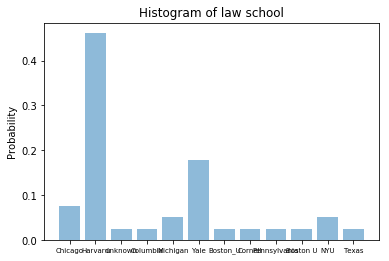

In [7]:
plotProbDist(probDict)

In [8]:
def findLawSch(judgeName, year, dataset):
    
    sch_list = []
    
    for i in range(len(dataset['Judge Name'])):
            if( dataset['Judge Name'][i] == judgeName and dataset['Year'][i] == year):
                sch_list.append(dataset['Clerk Law School'][i])
                
    cnt = co.Counter(sch_list)
    prob_dict = {}
    for sch,ct in cnt.items():
        prob_dict.update({sch: ct/len(sch_list)})
                
    return sch_list, cnt, prob_dict

In [10]:
findLawSch('Cacheris_James_C', 1995, clerk_data)

([9999, 9999], Counter({9999: 2}), {9999: 1.0})